In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [2]:
cnx = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="ishandas8981")
   

In [3]:
query = "SELECT * FROM banking_case.CUSTOMER"


In [4]:
df = pd.read_sql(query, cnx)

C:\Users\ishan\AppData\Local\Temp\ipykernel_9188\1600954950.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [5]:
cnx.close()

In [6]:
df.head(4)

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4


In [7]:
df.shape

(3000, 25)

In [8]:
# generating descriptive stats for statistics
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [9]:
#trying to classify "Estimated Income" into categories like 'low', 'mid',
#'high' based on its value — this is called binning or bucketing.



bins = [0, 100000, 300000, float('inf')]
labels = ['low','mid','high']
df['Income Band'] = pd.cut(df["Estimated Income"],bins=bins,labels=labels,right = False)

In [10]:
#bins = [1,3,float('inf')]
#labels= ['low','high']
#df['test risk']=pd.cut(df['Risk Weighting'],bins = bins,labels=labels,right = False)

## Develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

In [11]:
df['Risk_Flag'] = df['Risk Weighting'].apply(lambda x: 1 if x >= 3 else 0) 
#f the value (x) is greater than or equal to 3, return 1 → meaning high risk.
#Otherwise, return 0 → meaning low risk.


In [12]:

df.head()

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Income Band,Risk_Flag
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,607332.46,12249.96,1134475.30,1,2,1,1,1,low,0
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,344635.16,61162.31,2000526.10,1,3,2,1,2,mid,1
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,203054.35,79071.78,548137.58,1,3,3,2,3,mid,1
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,234685.02,57513.65,1148402.29,0,4,4,1,4,high,1
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,128351.45,30012.14,1674412.12,0,3,1,2,5,mid,1


In [25]:
# Examine the distribution of unique catagories in categorical columns
#This can be also called a univariate analysis
categorical_col = df[["BRId","GenderId","IAId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns

for col in categorical_col:
    print(f"Value Counts for {col}:")
    
    display(df[col].value_counts())
    

Value Counts for BRId:


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for GenderId:


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Counts for IAId:


IAId
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for Amount of Credit Cards:


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for Nationality:


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for Occupation:


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for Fee Structure:


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for Loyalty Classification:


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Counts for Properties Owned:


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Counts for Risk Weighting:


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value Counts for Income Band:


Income Band
mid     1517
low     1027
high     456
Name: count, dtype: int64

In [14]:
for col in categorical_col:
    print(f"\n{col} Risk Rate:")
    display(df.groupby(col)['Risk_Flag'].mean().sort_values(ascending=False))



BRId Risk Rate:


BRId
4    0.334686
2    0.333333
3    0.309911
1    0.292424
Name: Risk_Flag, dtype: float64


GenderId Risk Rate:


GenderId
1    0.323253
2    0.304894
Name: Risk_Flag, dtype: float64


IAId Risk Rate:


IAId
11    0.403409
18    0.397727
16    0.375000
1     0.361582
5     0.348315
2     0.344633
17    0.340909
7     0.325843
4     0.322034
13    0.318182
14    0.312500
15    0.306818
3     0.305085
20    0.295455
10    0.295455
22    0.295455
9     0.284091
19    0.272727
6     0.258427
12    0.255682
21    0.250000
8     0.248588
Name: Risk_Flag, dtype: float64


Amount of Credit Cards Risk Rate:


Amount of Credit Cards
2    0.345098
1    0.310094
3    0.261981
Name: Risk_Flag, dtype: float64


Nationality Risk Rate:


Nationality
European      0.329259
African       0.323864
Asian         0.316976
Australian    0.311024
American      0.268245
Name: Risk_Flag, dtype: float64


Occupation Risk Rate:


Occupation
Environmental Tech             0.666667
Compensation Analyst           0.636364
Desktop Support Technician     0.636364
Research Assistant III         0.615385
Assistant Manager              0.611111
                                 ...   
Staff Scientist                0.133333
Software Test Engineer III     0.111111
Mechanical Systems Engineer    0.100000
Health Coach I                 0.090909
Accounting Assistant IV        0.052632
Name: Risk_Flag, Length: 195, dtype: float64


Fee Structure Risk Rate:


Fee Structure
Mid     0.323285
High    0.309621
Low     0.309609
Name: Risk_Flag, dtype: float64


Loyalty Classification Risk Rate:


Loyalty Classification
Platinum    0.318612
Silver      0.318123
Gold        0.316239
Jade        0.309542
Name: Risk_Flag, dtype: float64


Properties Owned Risk Rate:


Properties Owned
2    0.320463
0    0.313475
1    0.311856
3    0.309973
Name: Risk_Flag, dtype: float64


Risk Weighting Risk Rate:


Risk Weighting
3    1.0
5    1.0
4    1.0
1    0.0
2    0.0
Name: Risk_Flag, dtype: float64


Income Band Risk Rate:


C:\Users\ishan\AppData\Local\Temp\ipykernel_9188\2674641040.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby(col)['Risk_Flag'].mean().sort_values(ascending=False))


Income Band
high    0.877193
mid     0.305208
low     0.076923
Name: Risk_Flag, dtype: float64

High-income customers may be over-leveraged — they might borrow more and take higher risks.

There might be more risky products or complex investments offered to high-income individuals.

Or, your risk model could be capturing behavioral risk, not just financial capacity.



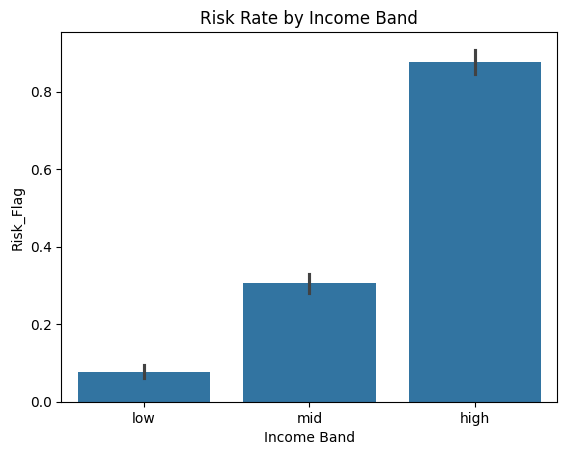

In [15]:
sns.barplot(data=df, x='Income Band', y='Risk_Flag')
plt.title('Risk Rate by Income Band')
plt.show()


In [16]:
high_risk_df = df[df['Risk_Flag'] == 1]
high_risk_df['Occupation'].value_counts(normalize=True) * 100


Occupation
Assistant Manager              1.167728
Cost Accountant                1.167728
Environmental Tech             1.061571
Database Administrator III     1.061571
Software Consultant            1.061571
                                 ...   
Accounting Assistant IV        0.106157
Software Test Engineer III     0.106157
Health Coach I                 0.106157
Senior Sales Associate         0.106157
Mechanical Systems Engineer    0.106157
Name: proportion, Length: 195, dtype: float64

In [17]:
high_risk_df[['Bank Deposits', 'Checking Accounts', 'Saving Accounts']].mean()


Bank Deposits        954294.701369
Checking Accounts    449870.387569
Saving Accounts      342748.447187
dtype: float64

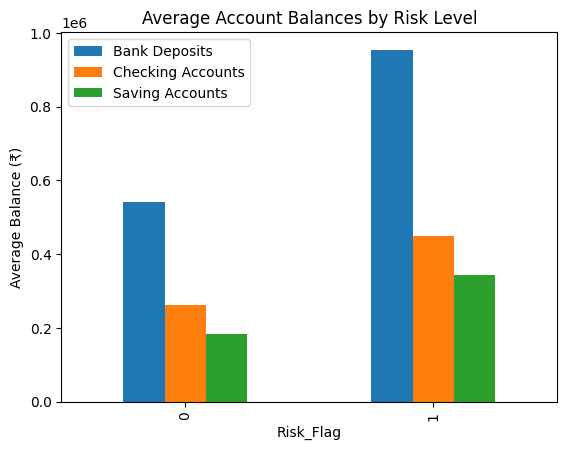

In [18]:
df.groupby('Risk_Flag')[['Bank Deposits', 'Checking Accounts', 'Saving Accounts']].mean().plot(kind='bar')
plt.title('Average Account Balances by Risk Level')
plt.ylabel('Average Balance (₹)')
plt.show()


Insights
High-risk customers tend to have substantial balances in all three account types.

Bank Deposits being the highest suggests they may be using these accounts for larger transactions or savings, but could also indicate overextension (e.g., using credit to keep up deposits).

Checking Accounts and Saving Accounts show moderate balances, which could be due to regular banking activities, but it may also imply higher spending or loans.


## Univariate Analysis for categorical columns

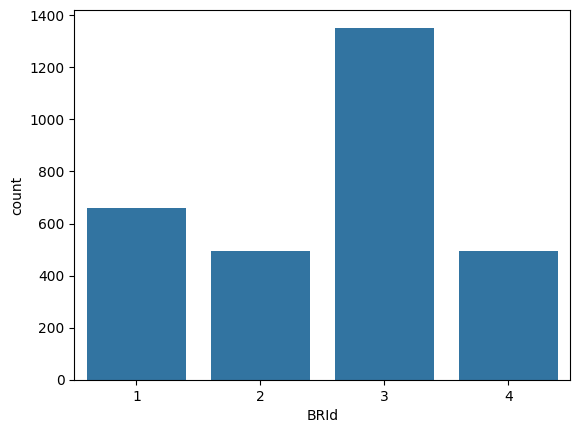

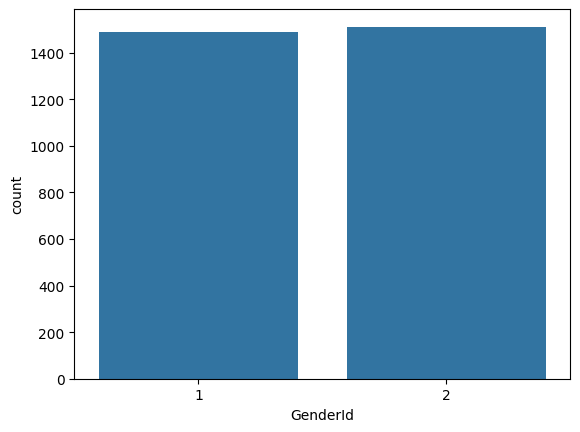

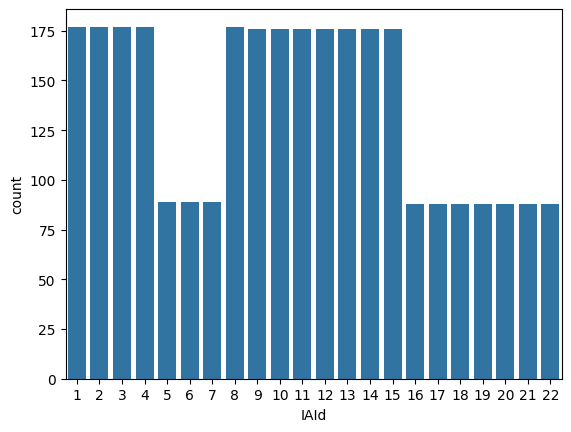

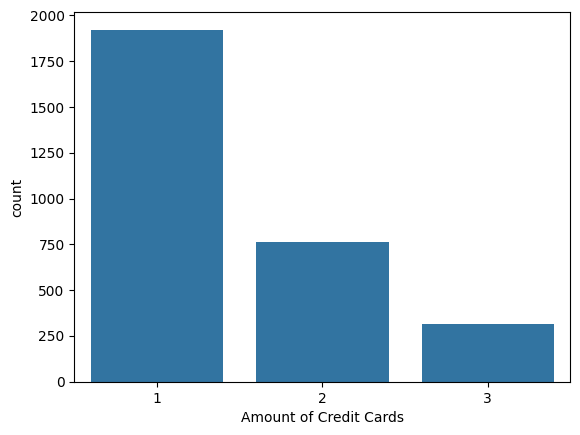

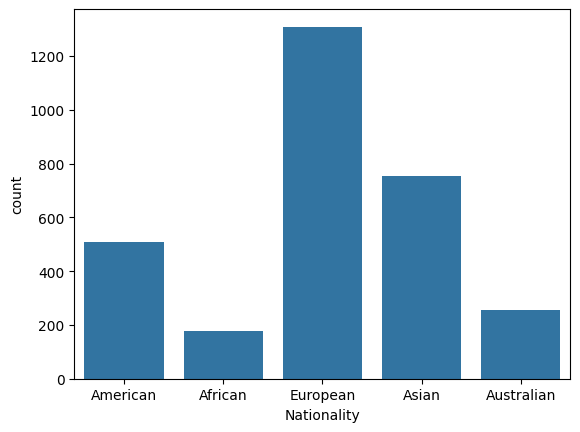

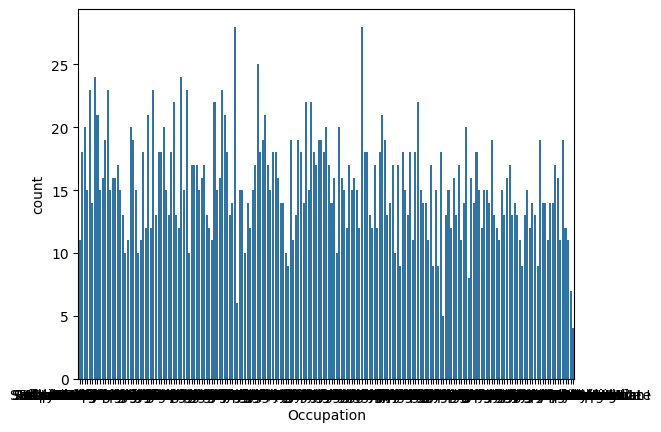

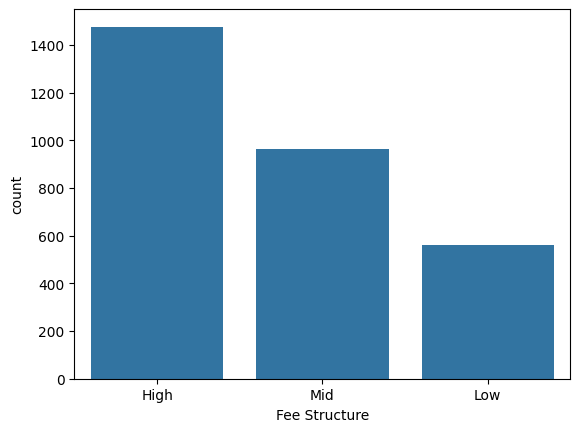

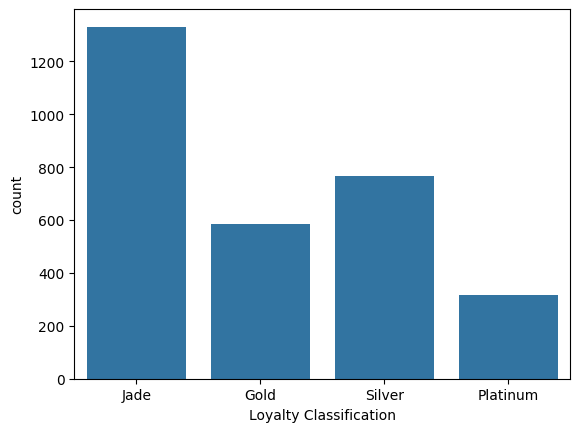

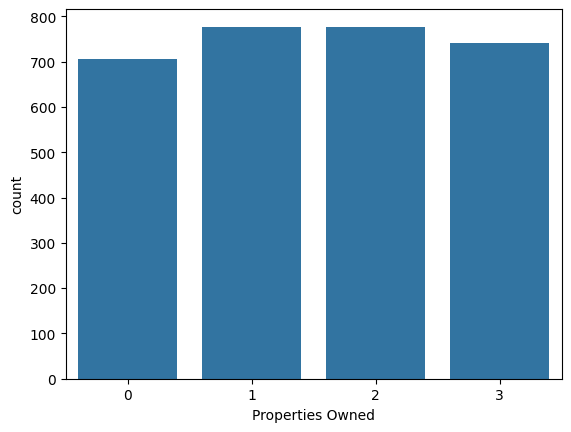

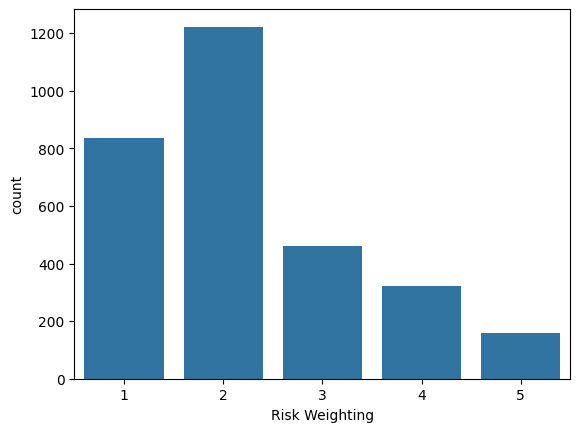

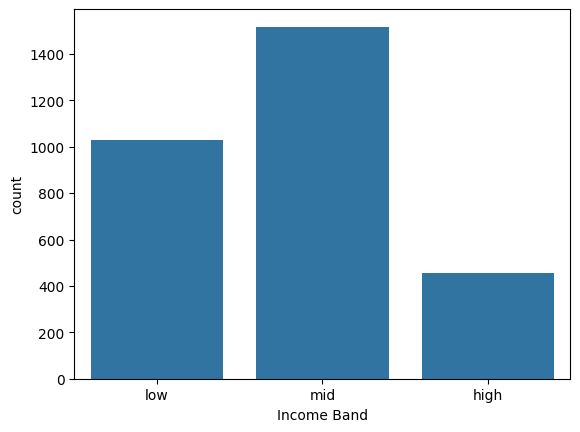

In [19]:
for i, predictor in enumerate(df[["BRId","GenderId","IAId","Amount of Credit Cards",
                                  "Nationality","Occupation","Fee Structure",
                                  "Loyalty Classification","Properties Owned",
                                  "Risk Weighting","Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

## Bivariate Analysis for categorical columns

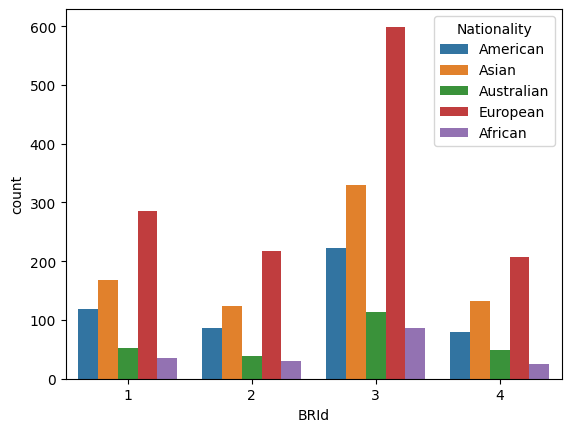

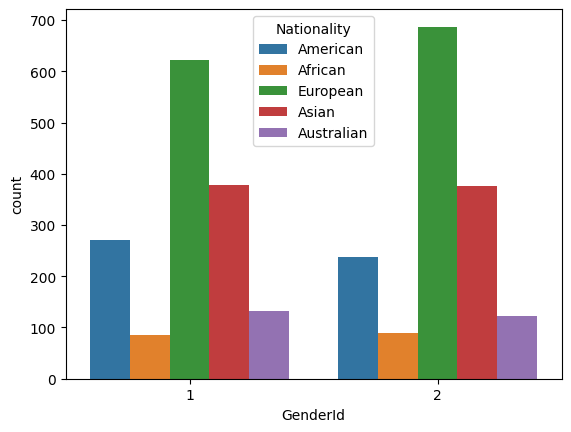

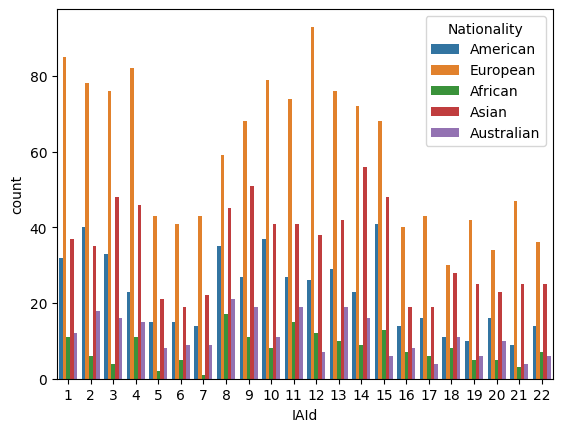

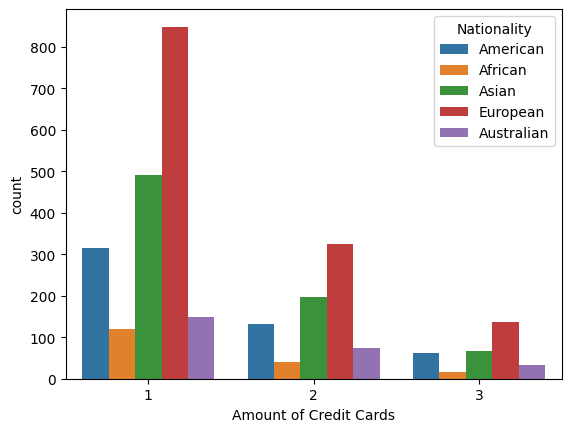

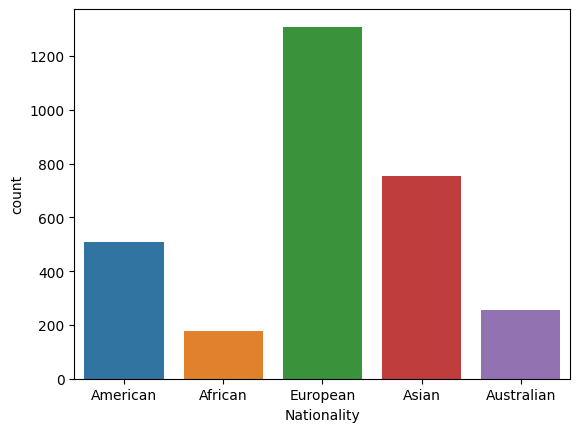

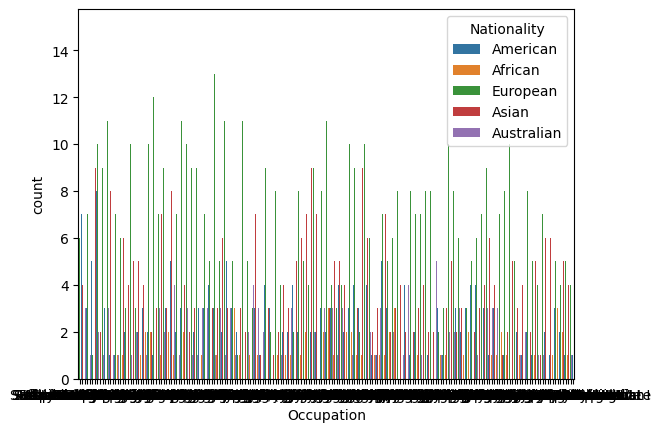

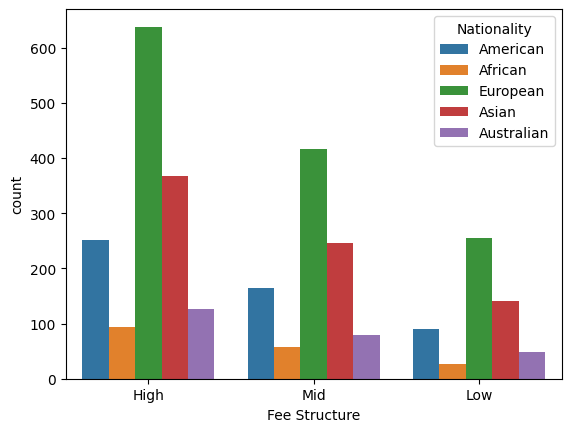

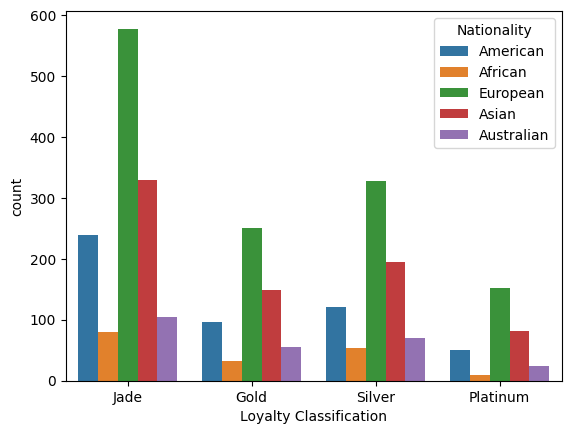

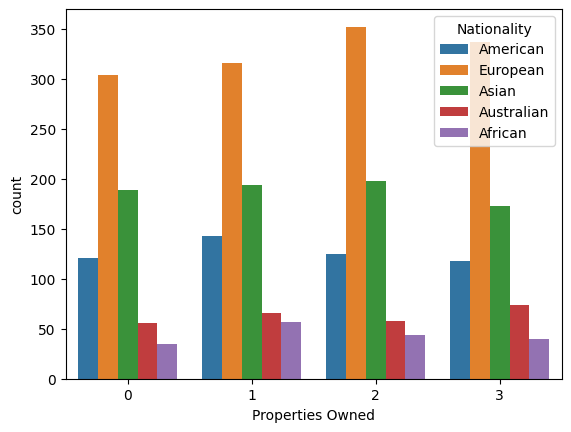

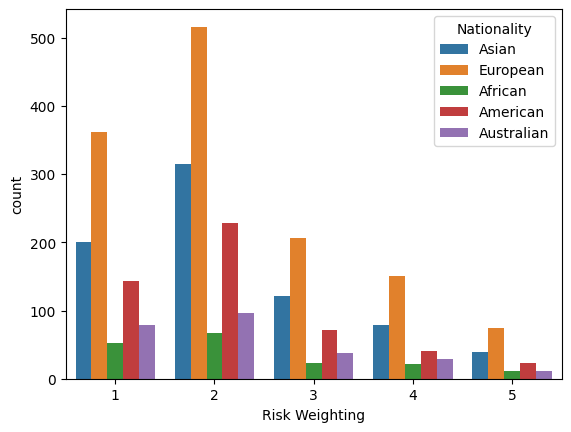

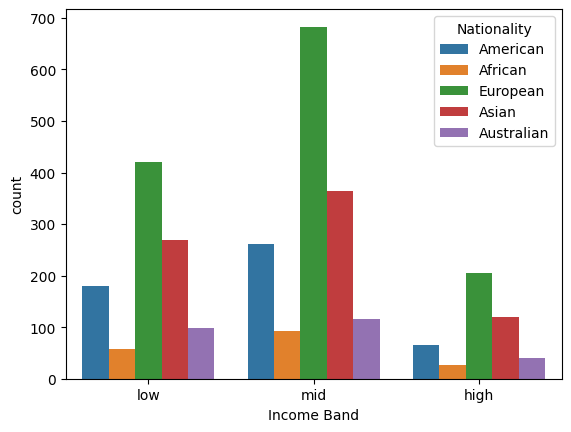

In [20]:

for i, predictor in enumerate(df[["BRId","GenderId","IAId","Amount of Credit Cards",
                                  "Nationality","Occupation","Fee Structure",
                                  "Loyalty Classification","Properties Owned",
                                  "Risk Weighting","Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue="Nationality")


#if we remove the hue this will be a univariate right now it is a bivariate


In [21]:
pd.crosstab(df["Nationality"], df["Risk Weighting"], normalize='index') * 100


Risk Weighting,1,2,3,4,5
Nationality,,,,,
African,29.545455,38.068182,13.068182,12.500000,6.818182
American,28.205128,44.970414,14.201183,8.086785,4.536489
Asian,26.525199,41.777188,16.047745,10.477454,5.172414
Australian,31.102362,37.795276,14.960630,11.417323,4.724409
European,27.654698,39.419404,15.737204,11.535523,5.653170


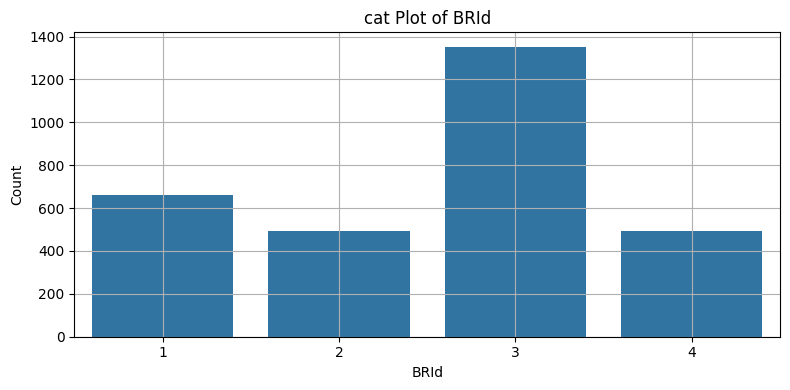

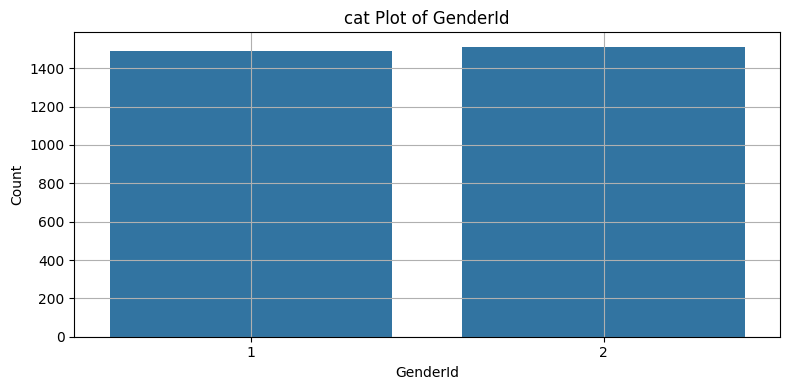

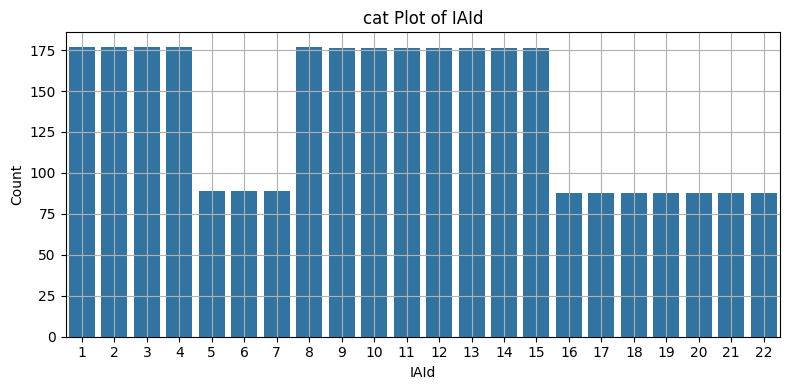

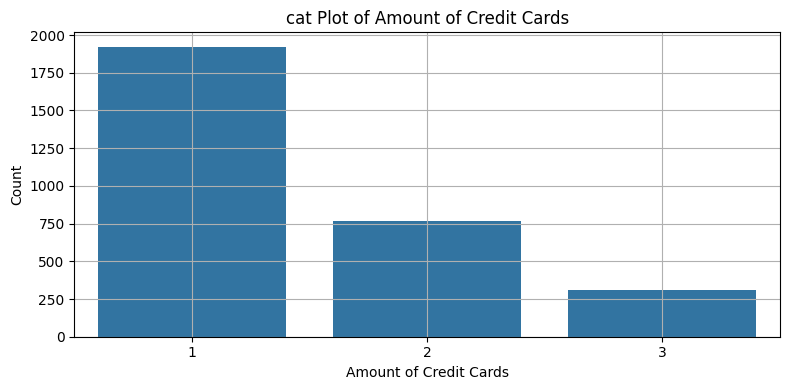

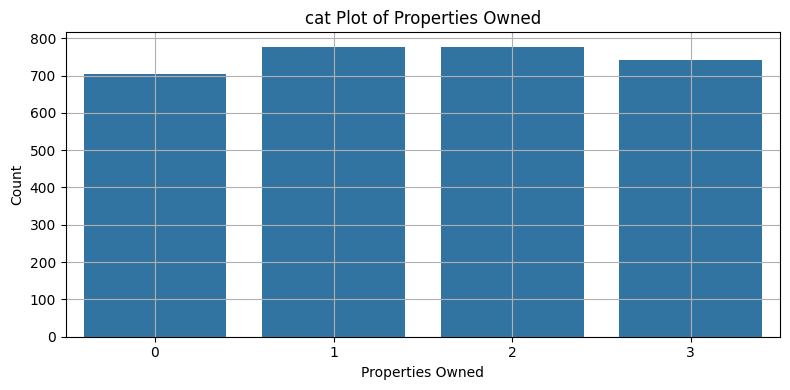

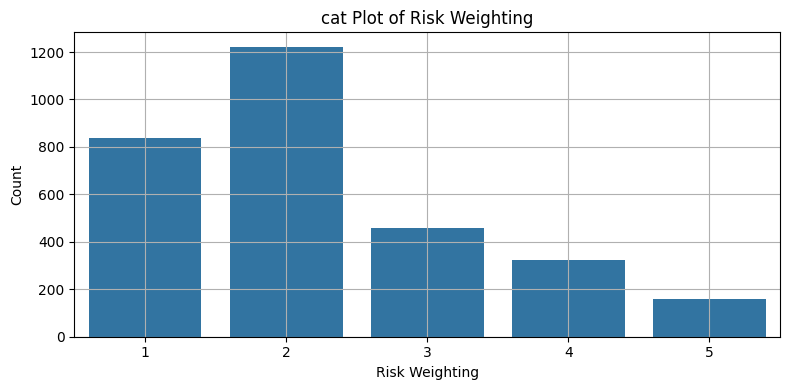

In [22]:
numerical_in_categorical = [
    'BRId', 'GenderId', 'IAId',
    'Amount of Credit Cards', 'Properties Owned', 'Risk Weighting'
]
for col in numerical_in_categorical:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'cat Plot of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


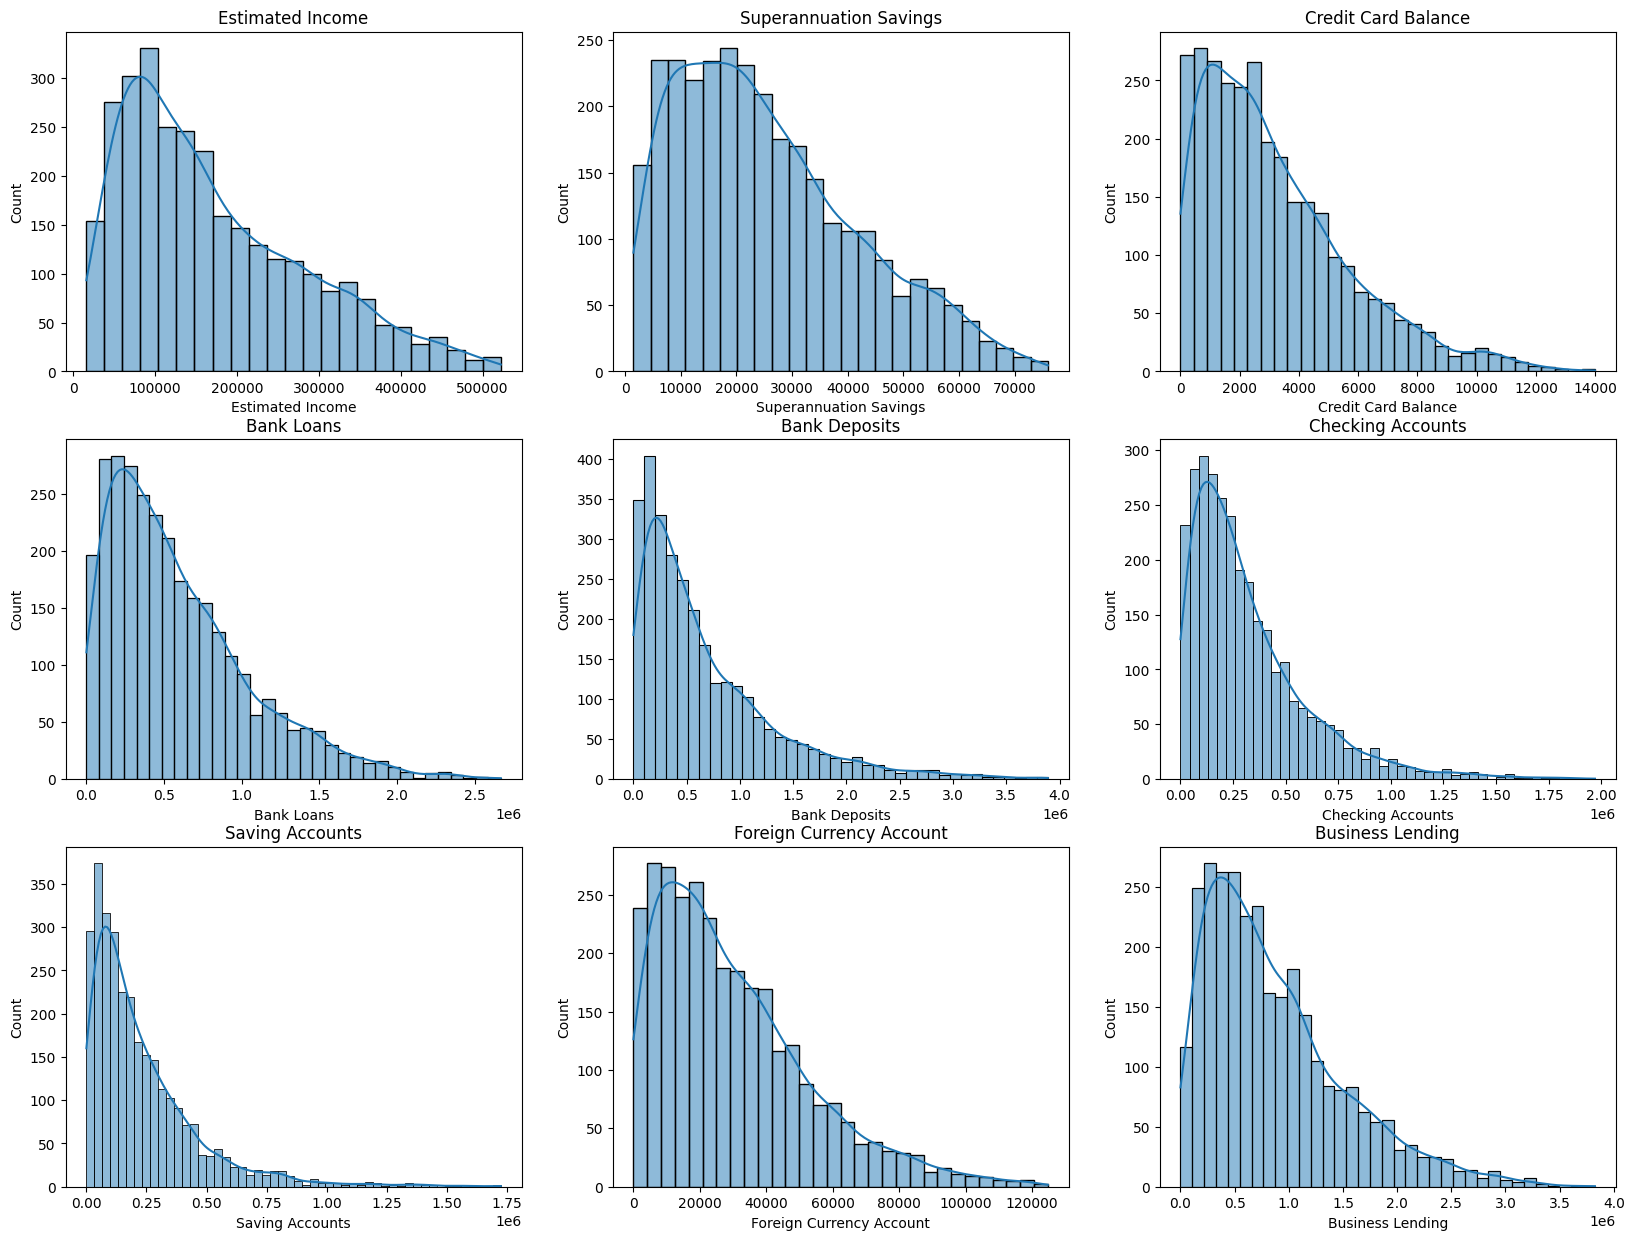

In [23]:
 numerical_col = ["Estimated Income","Superannuation Savings",
                  "Credit Card Balance","Bank Loans","Bank Deposits","Checking Accounts","Saving Accounts","Foreign Currency Account","Business Lending"]


plt.figure(figsize=(20,15))
for i,col in enumerate(numerical_col):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col],kde = True)
    plt.title(col)
plt.show()

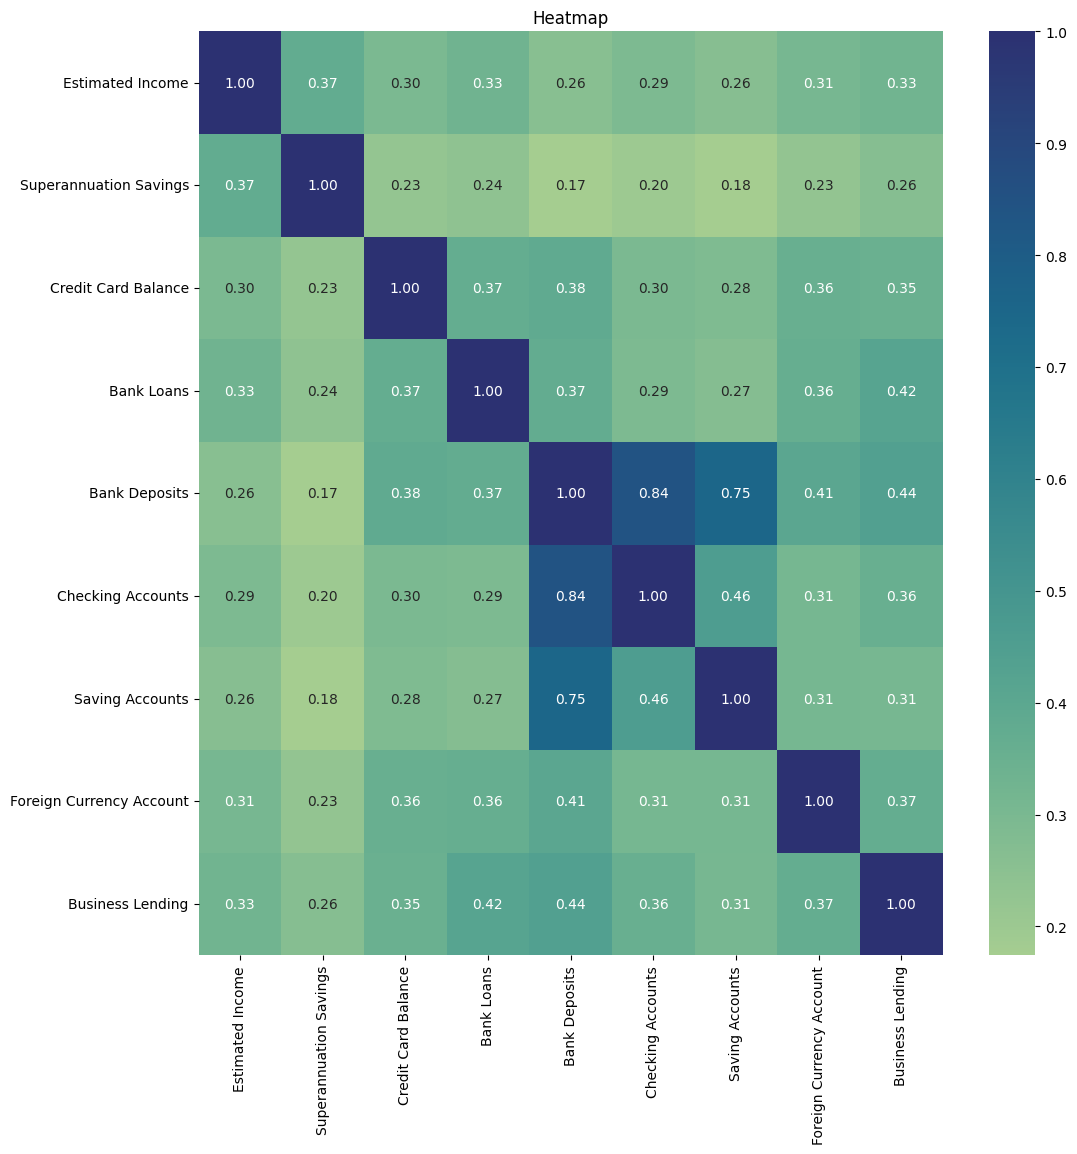

In [24]:
numerical_col = ["Estimated Income","Superannuation Savings",
                  "Credit Card Balance","Bank Loans","Bank Deposits",
                 "Checking Accounts", "Saving Accounts","Foreign Currency Account",
                 "Business Lending"]

correlation_matrix = df[numerical_col].corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot = True, cmap='crest',fmt=".2f")
plt.title('Heatmap')
plt.show()

Key Insight:
People who have higher balances in Bank Deposits also tend to have larger amounts in their Savings Accounts and Checking Accounts.

Cross-Selling Opportunity:
If someone has a lot in a savings account, the bank might suggest they open a fixed deposit, invest, or upgrade to premium services.

Customer Behavior:
Customers who are financially stable or have high income may maintain healthy balances in all their accounts — not just one.